# Modélisation de la dernière heure d'arrivée

#### Nous cherchons à modéliser l'heure d'arrivée du dernier déplacement de la journée

## I - Base de données

In [1]:
''' Importation des packages nécessaires '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime as dt
import scipy.stats
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 17.2 MB/s eta 0:00:00


In [2]:
emp_df=pd.read_excel("EMP_deplacements.xlsx")

### Base de données des déplacements journaliers issue de l'enquête de mobilité des personnes (EMP 2019) :

In [3]:
emp_df.head()

,IDENT_IND,POND_JOUR,Motif,Stationnement,Lieu_Depart,Lieu_Arrivee,TYPE_jour,HEURE_DEPART,HEURE_ARRIVEE,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,Segment_detail,Segment,num_dep_V
0,110000011400001,9891.108772,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,Parking,mercredi,14.25,14.333333,2029-01-03 14:15:00,2029-01-03 14:20:00,2.20000,Particulier,Particulier,1
1,110000011400001,9891.108772,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,mercredi,14.75,14.833333,2029-01-03 14:45:00,2029-01-03 14:50:00,2.20000,Particulier,Particulier,2
2,110000011500001,5275.295948,"Étudier (école, lycée, université)",Emplacement dans un parking public ou commerci...,Domicile,Parking,vendredi,7.75,8.750000,2029-01-05 07:45:00,2029-01-05 08:45:00,28.00000,Particulier,Particulier,1
3,110000011500001,5275.295948,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,vendredi,10.50,11.000000,2029-01-05 10:30:00,2029-01-05 11:00:00,28.00000,Particulier,Particulier,2
4,110000013500002,24058.724023,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Domicile,Entreprise,mercredi,15.00,15.250000,2029-01-03 15:00:00,2029-01-03 15:15:00,5.32141,Particulier,Particulier,1


### Base de donnée rencensant le dernier déplacement de chaque individu de l'enquête :

#### On calcule d'abord le nombre de déplacements éfecctués par chaque individu de l'enquête :

In [4]:
nb_dep_df=emp_df.groupby("IDENT_IND")["num_dep_V"].max().to_frame().rename(columns={"num_dep_V":"nb_dep"})

In [5]:
nb_dep_df

,nb_dep
IDENT_IND,
110000011400001,2
110000011500001,2
110000013500002,2
110000013600001,2
110000014400001,2
...,...
940000036100001,2
940000036400001,2
940000041500002,2


In [6]:
print("Cela nous permet de voir en même temps qu'il y a ", len(nb_dep_df), " individus.")

Cela nous permet de voir en même temps qu'il y a  7105  individus.


#### On garde ensuite depuis la base de donnée initiale, seulement le dernier déplacement de chaque individu (qui correspond au déplacement ayant comme numéro le nombre total de déplacements de la personne :

In [7]:
emp_Tdep_df=emp_df.set_index("IDENT_IND")

In [8]:
emp_Tdep_df["nb_dep"]=nb_dep_df["nb_dep"]

In [9]:
emp_Tdep_df=emp_Tdep_df[emp_Tdep_df["num_dep_V"]==emp_Tdep_df["nb_dep"]]

In [10]:
emp_Tdep_df

,POND_JOUR,Motif,Stationnement,Lieu_Depart,Lieu_Arrivee,TYPE_jour,HEURE_DEPART,HEURE_ARRIVEE,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,Segment_detail,Segment,num_dep_V,nb_dep
IDENT_IND,,,,,,,,,,,,,,,
110000011400001,9891.108772,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,mercredi,14.75,14.833333,2029-01-03 14:45:00,2029-01-03 14:50:00,2.200000,Particulier,Particulier,2,2
110000011500001,5275.295948,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,vendredi,10.50,11.000000,2029-01-05 10:30:00,2029-01-05 11:00:00,28.000000,Particulier,Particulier,2,2
110000013500002,24058.724023,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Entreprise,Domicile,mercredi,23.75,23.916667,2029-01-03 23:45:00,2029-01-03 23:55:00,5.321410,Particulier,Particulier,2,2
110000013600001,20658.322154,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Rue,Rue,mardi,18.00,19.000000,2029-01-02 18:00:00,2029-01-02 19:00:00,25.232499,Particulier,Particulier,2,2
110000014400001,31828.347792,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Rue,Rue,samedi,9.25,9.416667,2029-01-06 09:15:00,2029-01-06 09:25:00,3.000000,Particulier,Particulier,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940000036400001,42481.676290,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Entreprise,Rue,samedi,19.50,20.166667,2029-01-06 19:30:00,2029-01-06 20:10:00,35.000000,Particulier,Particulier,2,2
940000041500002,17037.898067,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,mercredi,15.50,15.750000,2029-01-03 15:30:00,2029-01-03 15:45:00,5.000000,Particulier,Particulier,2,2
940000041500002,17037.898067,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,mercredi,11.00,11.500000,2029-01-03 11:00:00,2029-01-03 11:30:00,25.000000,Particulier,Particulier,2,2


In [11]:
print("Nous voyons que nous avons maintenant ",len(emp_Tdep_df)," derniers déplacements alors qu'il y a ",len(nb_dep_df)," individus.")

Nous voyons que nous avons maintenant  7189  derniers déplacements alors qu'il y a  7105  individus.


#### Problème : on retrouve 83 lignes qui apparaissent plusieurs fois ce qui veut dire qu'une même personne a fait plusieurs fois un dernier déplacement ( deux déplacements numéro 4 par exemple si elle a fait 4 déplacements dans la journée) :

In [12]:
emp_Tdep_df.index.value_counts().to_frame()[emp_Tdep_df.index.value_counts().to_frame()['count']!=1]

,count
IDENT_IND,
740000235200001,3
410000013500001,2
730000344200002,2
310000131100001,2
260000095200001,2
...,...
430000092200002,2
820000371500001,2
830000031200001,2


#### Regardons de plus près les déplacements problématiques de ces 83 individus :

In [13]:
emp_Tdep_df=emp_Tdep_df.reset_index()

In [14]:
emp_Tdep_df[emp_Tdep_df.duplicated(subset=['IDENT_IND'],keep=False)].sort_values("IDENT_IND").set_index("IDENT_IND")

,POND_JOUR,Motif,Stationnement,Lieu_Depart,Lieu_Arrivee,TYPE_jour,HEURE_DEPART,HEURE_ARRIVEE,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,Segment_detail,Segment,num_dep_V,nb_dep
IDENT_IND,,,,,,,,,,,,,,,
110000046500001,28583.059972,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,vendredi,13.250000,13.500000,2029-01-05 13:15:00,2029-01-05 13:30:00,7.000000,Particulier,Particulier,2,2
110000046500001,28583.059972,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,vendredi,18.000000,18.166667,2029-01-05 18:00:00,2029-01-05 18:10:00,2.000000,Particulier,Particulier,2,2
110000075500001,15580.804263,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Rue,Domicile,vendredi,12.500000,12.583333,2029-01-05 12:30:00,2029-01-05 12:35:00,2.000000,Particulier,Particulier,1,1
110000075500001,15580.804263,NaN,NaN,Domicile,Rue,vendredi,5.500000,6.000000,2029-01-05 05:30:00,2029-01-05 06:00:00,15.000000,SERVICE,Entreprise,1,1
110000295500002,26214.945069,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Parking,Rue,samedi,12.166667,12.333333,2029-01-06 12:10:00,2029-01-06 12:20:00,2.000000,FONCTION,Entreprise,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930000901500001,19029.197222,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,vendredi,23.000000,23.833333,2029-01-05 23:00:00,2029-01-05 23:50:00,23.333333,Particulier,Particulier,2,2
940000015200001,20732.269972,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Rue,Domicile,samedi,16.666667,16.750000,2029-01-06 16:40:00,2029-01-06 16:45:00,3.750000,Particulier,Particulier,2,2
940000015200001,20732.269972,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,Domicile,samedi,12.000000,12.750000,2029-01-06 12:00:00,2029-01-06 12:45:00,30.000000,Particulier,Particulier,2,2


## II - Représentation graphique de la distribution empirique de la dernière heure d'arrivée 

#### On représente la distribution de la variable pour chaque jour de la semaine :

In [15]:
jours_semaine=['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']

In [16]:
jours_resultats=[jour for jour in jours_semaine if jour in list(set(emp_Tdep_df['TYPE_jour'].values))]

Text(0.5, 0.95, "Distribution empirique de la dernière heure d'arrivée par type de jour")

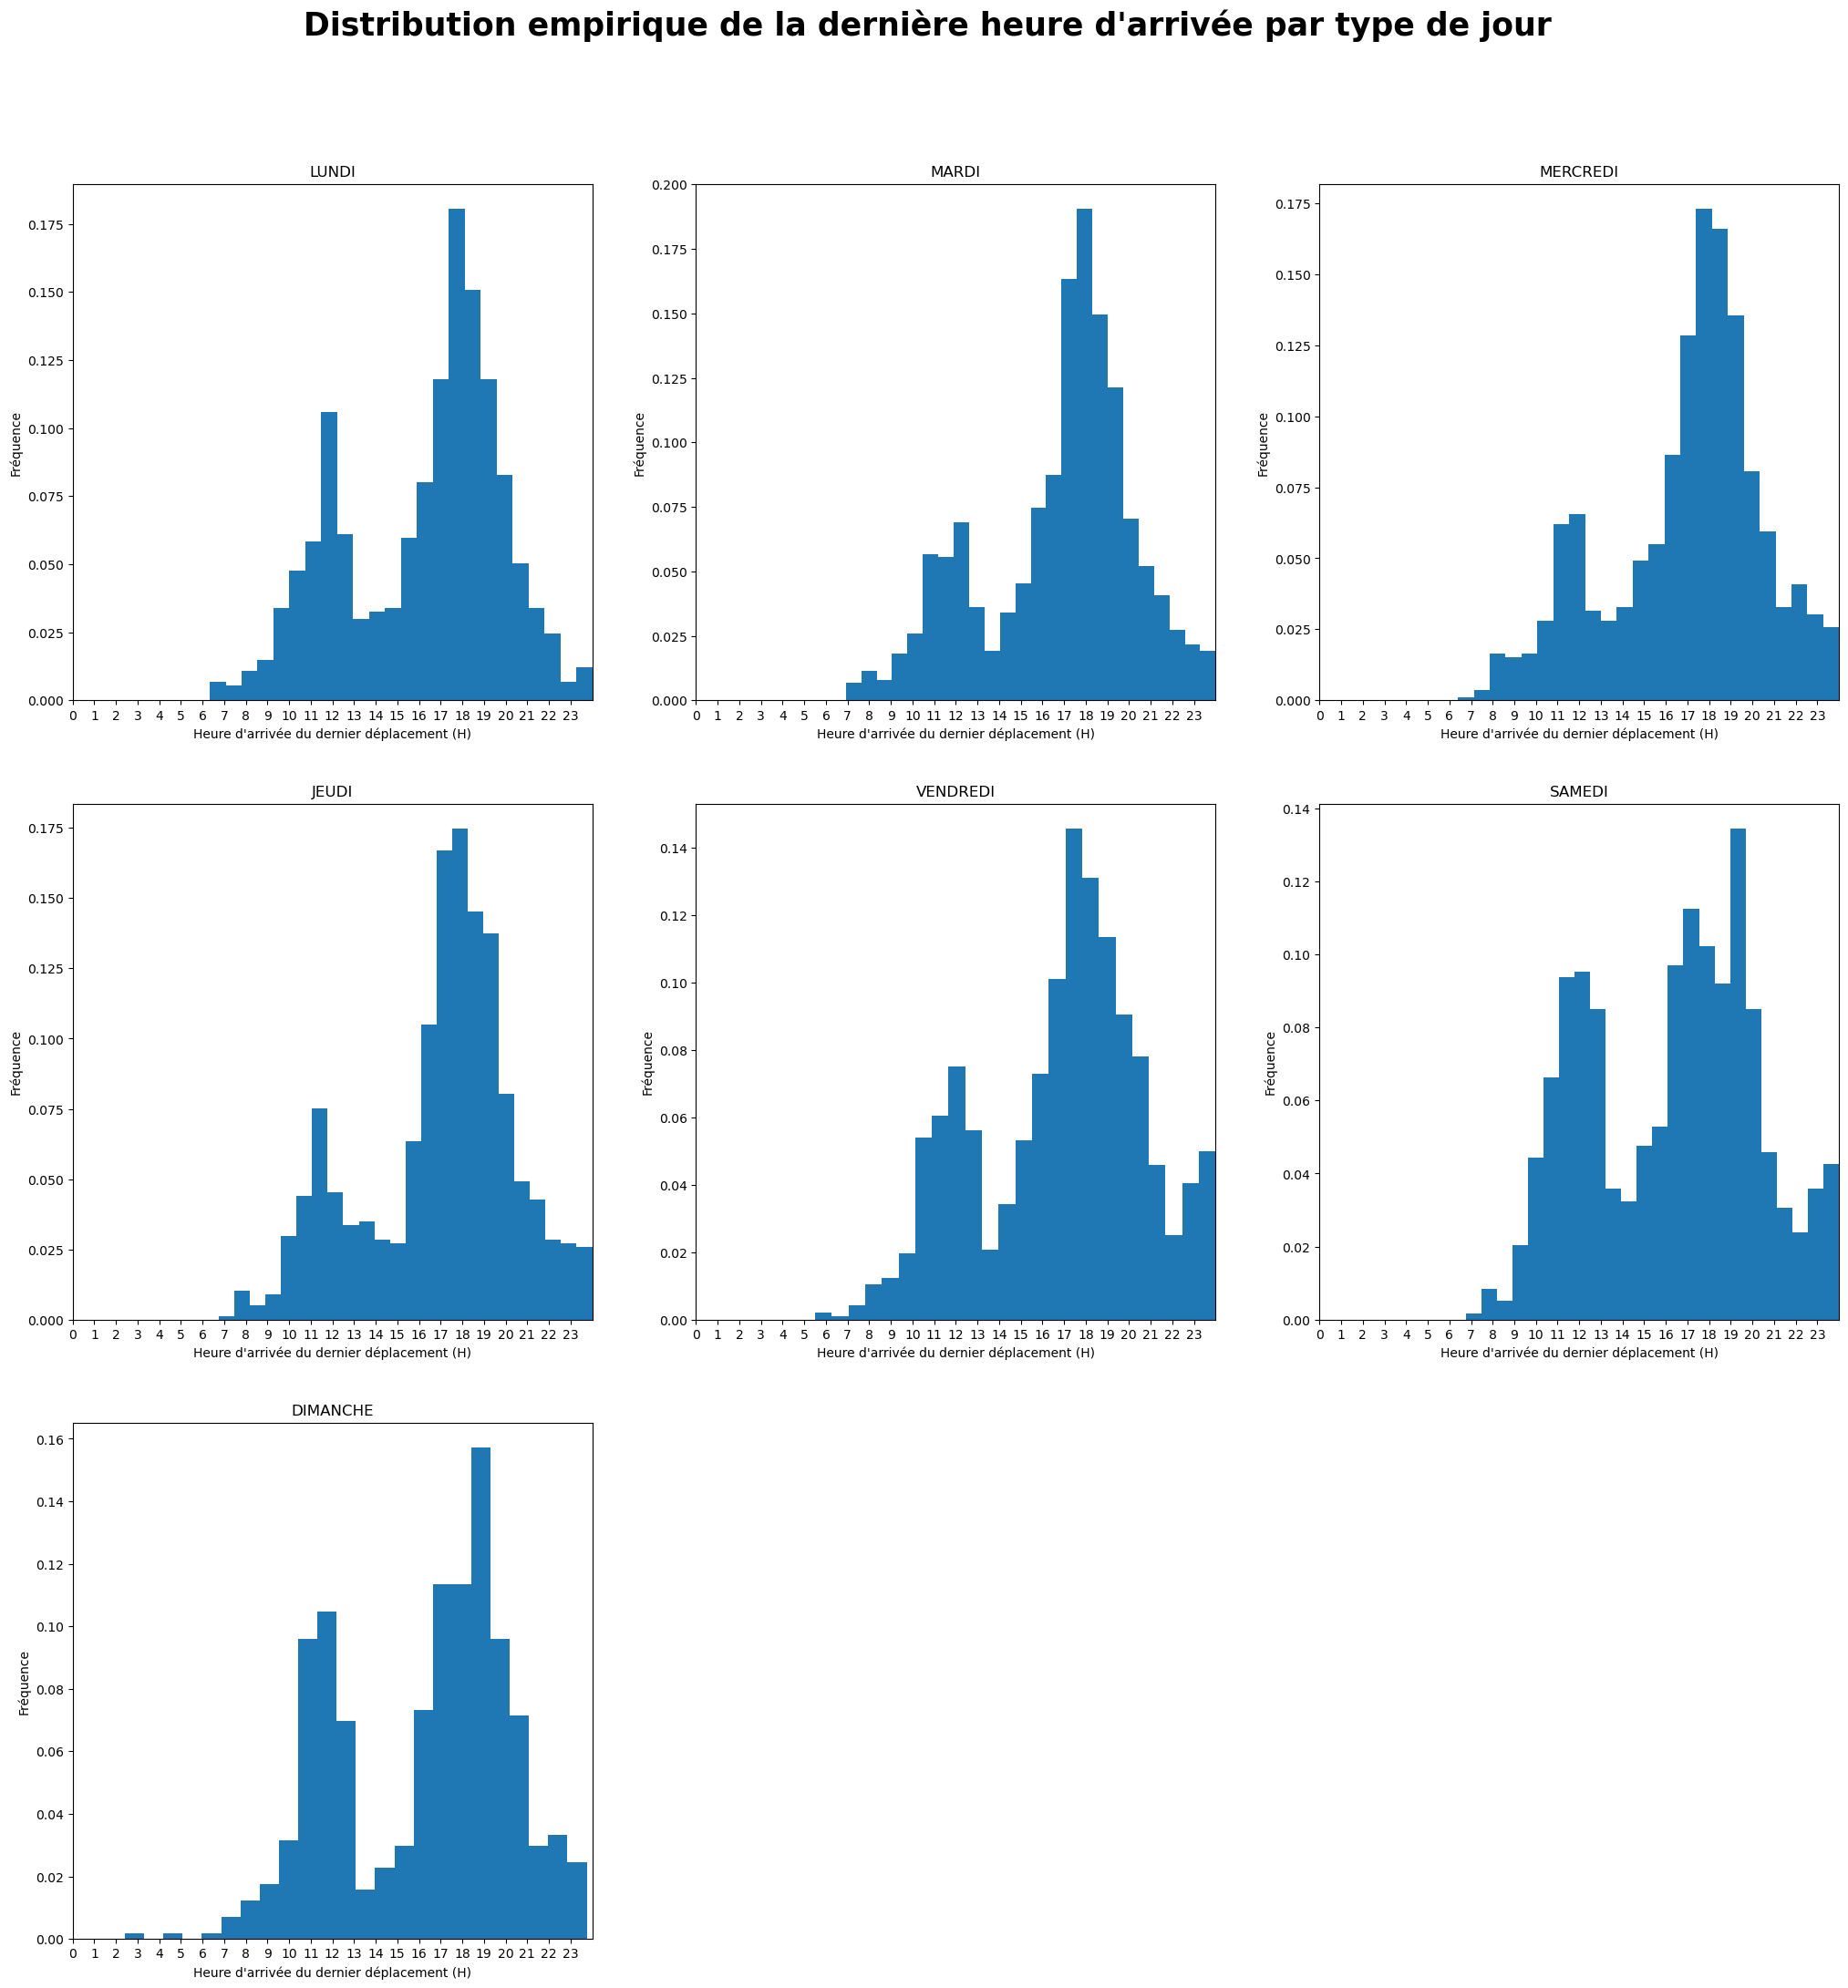

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))
b=0
for i in range(3):
    if i==2:
        r=1
    else:
        r=3
    for j in range(r):
        m=max(b,j)
        if i!=0:
            m=m+j
        jour=jours_resultats[m+i]
        emp_Tdep_df[emp_Tdep_df['TYPE_jour']==jour]['HEURE_ARRIVEE'].plot.hist(ax=ax[i][j],bins=24,xticks=np.arange(0,24,step=1),density=True,ylabel='Fréquence',xlim=(0,24),subplots=True,xlabel="Heure d'arrivée du dernier déplacement (H)")
        ax[i][j].set_title(jour.upper())
    b+=j
ax[2][1].set_axis_off()
ax[2][2].set_axis_off()
fig.suptitle("Distribution empirique de la dernière heure d'arrivée par type de jour",va='center', fontweight="bold",fontsize=25,y=0.95)

## III - Modélisation

#### Nous cherchons à modéliser la distribution de la variable "Dernière heure d'arrivée" en trouvant la loi qui lui correspond le plus :

In [18]:
'''Trouvons la loi qui correspond le plus à la variable "dernière heure d'arrivée" '''
dist_names = ['norm', 'beta','gamma', 'pareto', 't', 'lognorm', 'invgamma','loggamma', 'invgauss', 'alpha', 'chi', 'chi2'] #Liste des lois candidates
data = emp_Tdep_df[(emp_Tdep_df['TYPE_jour']!='samedi') & (emp_Tdep_df['TYPE_jour']!='dimanche')]['HEURE_ARRIVEE'].to_frame()

In [19]:
'''On cherche la loi qui a la plus petite somme des résidus au carré'''
sse = np.inf 
y, x = np.histogram(data, bins=24, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

# Pour chaque distribution
for name in dist_names:

	# Modéliser
	dist = getattr(scipy.stats, name)
	param = dist.fit(data)

	# Paramètres
	loc = param[-2]
	scale = param[-1]
	arg = param[:-2]

	# PDF
	pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
	# SSE
	model_sse = np.sum((y - pdf)**2)

	# Si le SSE est ddiminué, enregistrer la loi
	if model_sse < sse :
		best_pdf = pdf
		sse = model_sse
		best_loc = loc
		best_scale = scale
		best_arg = arg
		best_name = name



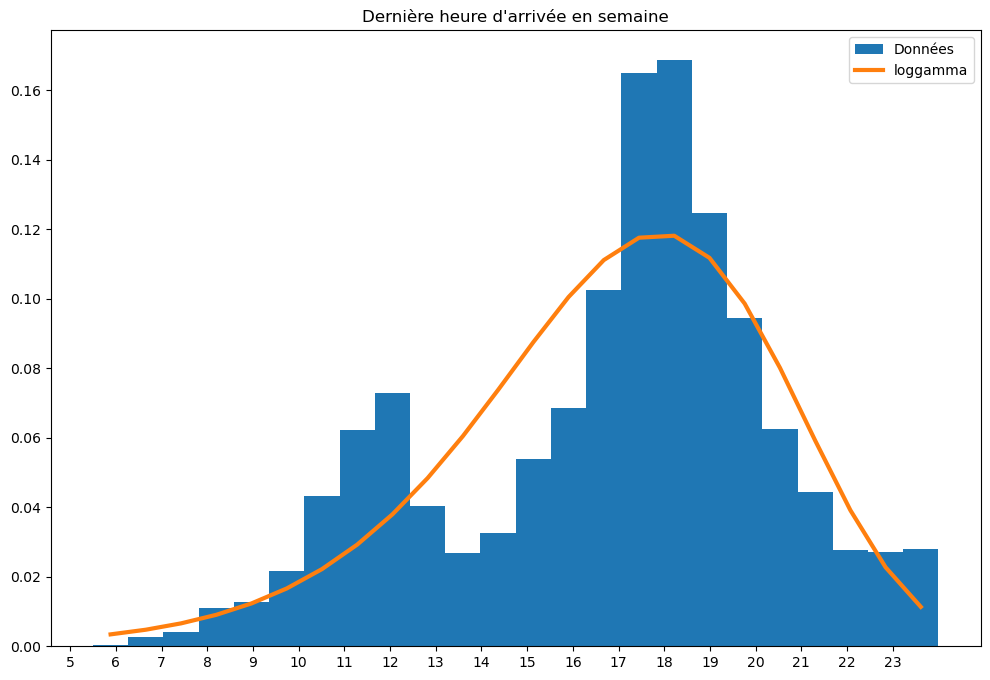

Selected Model :  loggamma
Loc. param. :  13.566937901013965
Scale param. :  5.007496458341151
Other arguments :  (2.377790990697622,)
SSE :  0.013865603191958968


In [21]:
plt.figure(figsize=(12,8))
plt.hist(data,label="Données",bins=24,density=True)
plt.xticks(np.arange(0,24))
plt.plot(x,best_pdf,label=best_name, linewidth=3)
plt.legend(loc='upper right')
plt.title("Dernière heure d'arrivée en semaine")
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)

In [27]:
''' On fait la même chose avec les jours de week-end'''
dataw = emp_Tdep_df[(emp_Tdep_df['TYPE_jour']=='samedi')|(emp_Tdep_df['TYPE_jour']!='dimanche')]['HEURE_ARRIVEE'].to_frame()

In [28]:
'''On cherche la loi qui a la plus petite somme des résidus au carré'''
sse = np.inf 
y, x = np.histogram(dataw, bins=24, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

# Pour chaque distribution
for name in dist_names:

	# Modéliser
	dist = getattr(scipy.stats, name)
	param = dist.fit(dataw)

	# Paramètres
	loc = param[-2]
	scale = param[-1]
	arg = param[:-2]

	# PDF
	pdf = dist.pdf(x, *arg, loc=loc, scale=scale)
	# SSE
	model_sse = np.sum((y - pdf)**2)

	# Si le SSE est ddiminué, enregistrer la loi
	if model_sse < sse :
		best_pdf = pdf
		sse = model_sse
		best_loc = loc
		best_scale = scale
		best_arg = arg
		best_name = name

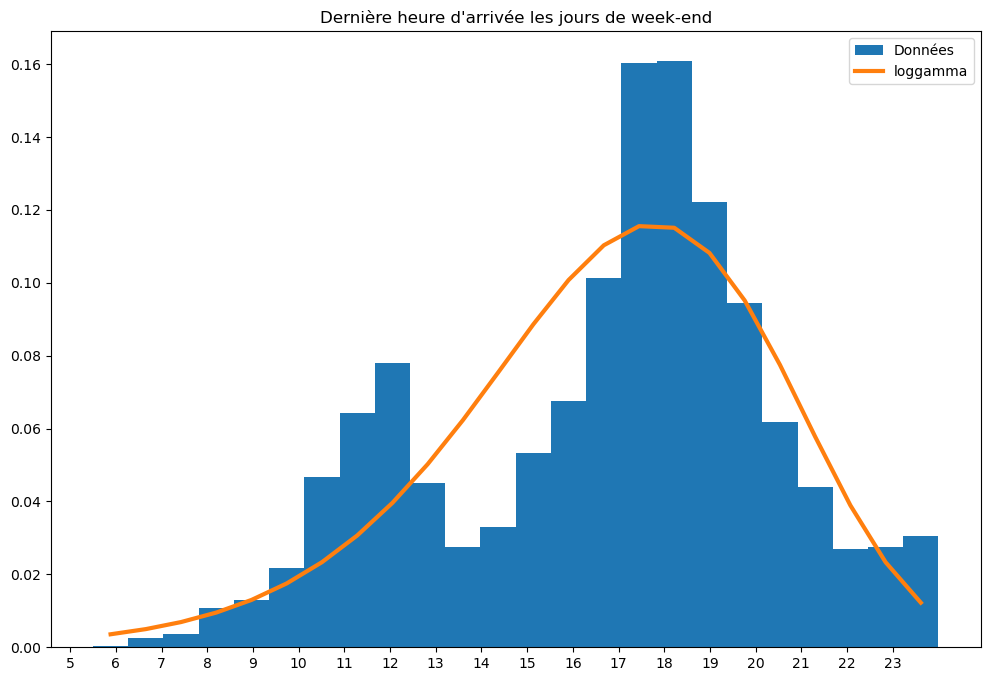

Selected Model :  loggamma
Loc. param. :  12.244875786828409
Scale param. :  5.50953933578592
Other arguments :  (2.732230041987292,)
SSE :  0.013885127386995405


In [29]:
plt.figure(figsize=(12,8))
plt.hist(dataw,label="Données",bins=24,density=True)
plt.xticks(np.arange(0,24))
plt.plot(x,best_pdf,label=best_name, linewidth=3)
plt.legend(loc='upper right')
plt.title("Dernière heure d'arrivée les jours de week-end")
plt.show()

# Détails sur la loi sélectionnée
print("Selected Model : ", best_name)
print("Loc. param. : ", best_loc)
print("Scale param. : ", best_scale)
print("Other arguments : ", best_arg)
print("SSE : ", sse)